In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
sys.path.append('../../tools/')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

import numpy as np

# read spec data
z = 0.0307
spec = '../../spectroscopy/SN2020jgb/ZTF20aayhacx_20200609_Gemini-N.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200609_GNIRS

## He I 10830

<AxesSubplot:>

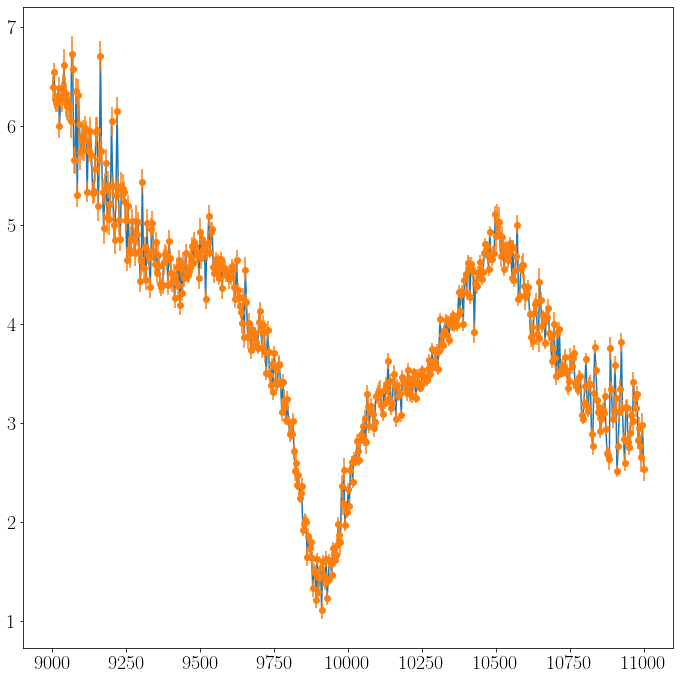

In [3]:
Spec1.plot_line_region(9000, 11000)

## He hvf + Fe II pvf

### Single Fe II line (10500)

In [4]:
Spec1.add_line('HeI_10830/FeII1',
               9450,
               10500,
               lines=[[10830], [10500]],
               rel_strength=[[], []])
Spec1.line['HeI_10830/FeII1'].LS_estimator(guess=(5, 5, -28000, 15, -2000,
                                                  -8000, 14, -2000))

LS estimation:
Velocity 1: -26385 km/s
Velocity 2: -7797 km/s


Normalize factor = 2.342


100%|██████████| 2000/2000 [00:11<00:00, 180.74it/s]


MCMC results:
Velocity 1: -26391 pm 50 km/s
Velocity 2: -7791 pm 124 km/s
Normalize factor = 2.344


  9%|▉         | 4500/50000 [00:25<04:13, 179.26it/s]

MCMC results:
Velocity 1: -26385 pm 51 km/s
Velocity 2: -7801 pm 118 km/s


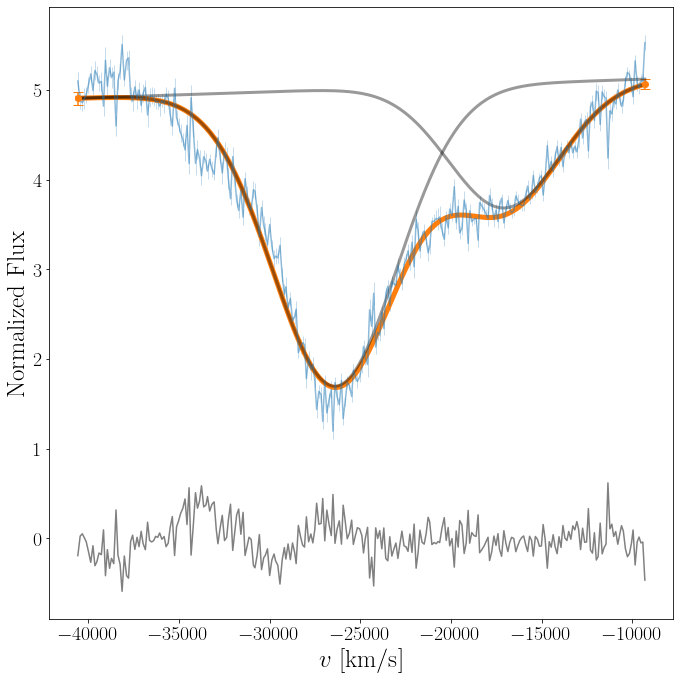

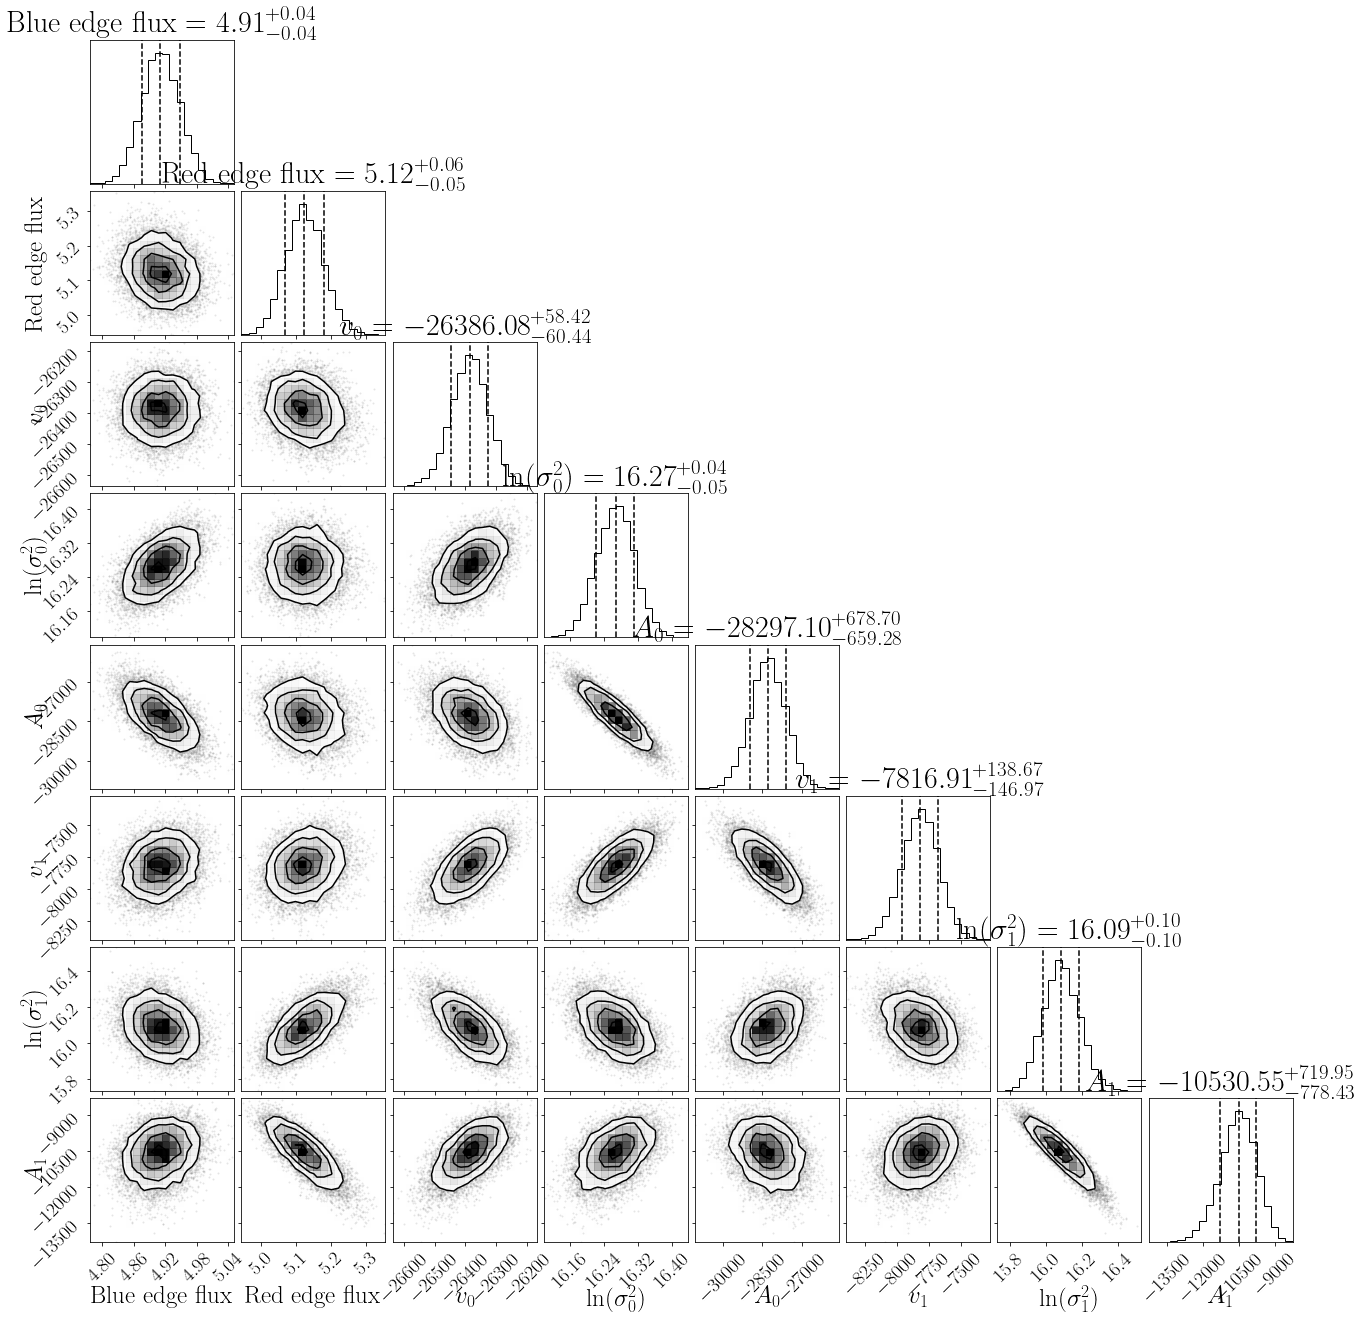

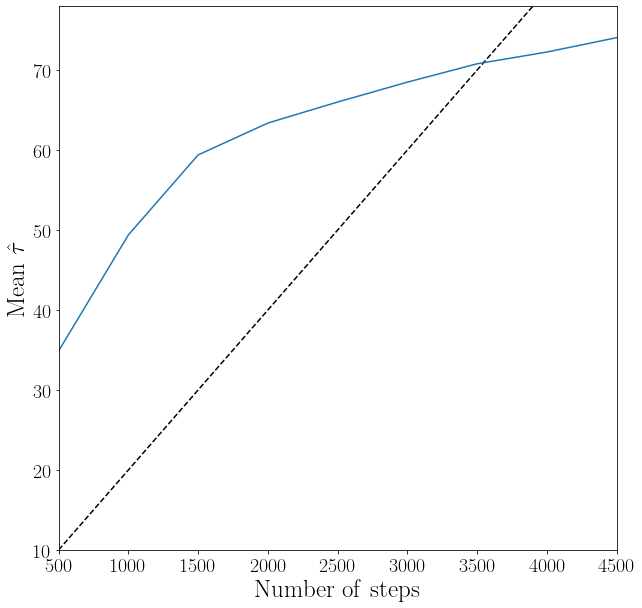

In [5]:
mu1 = -26000
mu2 = -8000
sampler = Spec1.line['HeI_10830/FeII1'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    var_max=1e10,
    initial=Spec1.line['HeI_10830/FeII1'].theta_LS,#[1, 1, -26000, 16, -5000, -8000, 16, -5000],
    normalize_unc='LS',
    max_nsteps=2000,
    Plot_model=False)
sampler = Spec1.line['HeI_10830/FeII1'].MCMC_sampler(
    mu_prior=[-26000, -8000],
    var_prior=[1e7, 1e7],
    initial=Spec1.line['HeI_10830/FeII1'].theta_MCMC,
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)

### Two Fe II lines

In [6]:
Spec1.add_line('HeI_10830/FeII2',
               9450,
               10600,
               lines=[[10830], [9998, 10500]],
               rel_strength=[[], [.5, 1]],
               free_rel_strength=[False, True])
               #rel_strength=[[], [0.832, 0.521]])
Spec1.line['HeI_10830/FeII2'].LS_estimator(guess=(5, 5, -28000, 15, -2000,
                                                 -8000, 14, -2000))

LS estimation:
Velocity 1: -26215 km/s
Velocity 2: -8591 km/s


Normalize factor = 2.028


100%|██████████| 5000/5000 [00:33<00:00, 149.96it/s]

MCMC results:
Velocity 1: -26172 pm 45 km/s
Velocity 2: -8507 pm 94 km/s


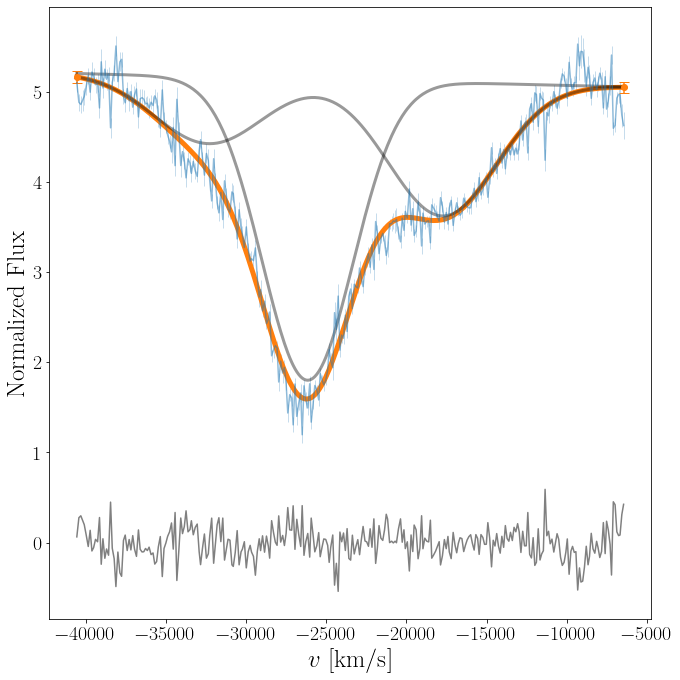

Normalize factor = 2.035


 10%|█         | 5000/50000 [00:33<05:03, 148.51it/s]

MCMC results:
Velocity 1: -26195 pm 47 km/s
Velocity 2: -8590 pm 108 km/s


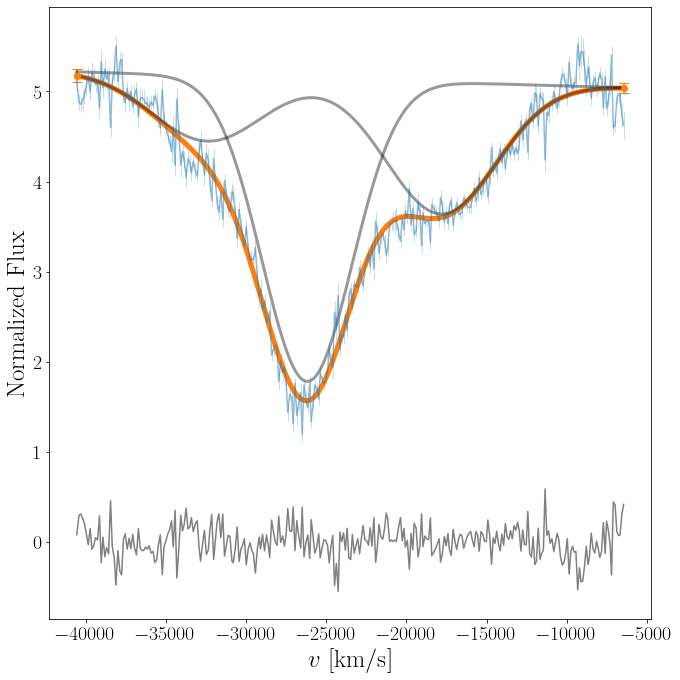

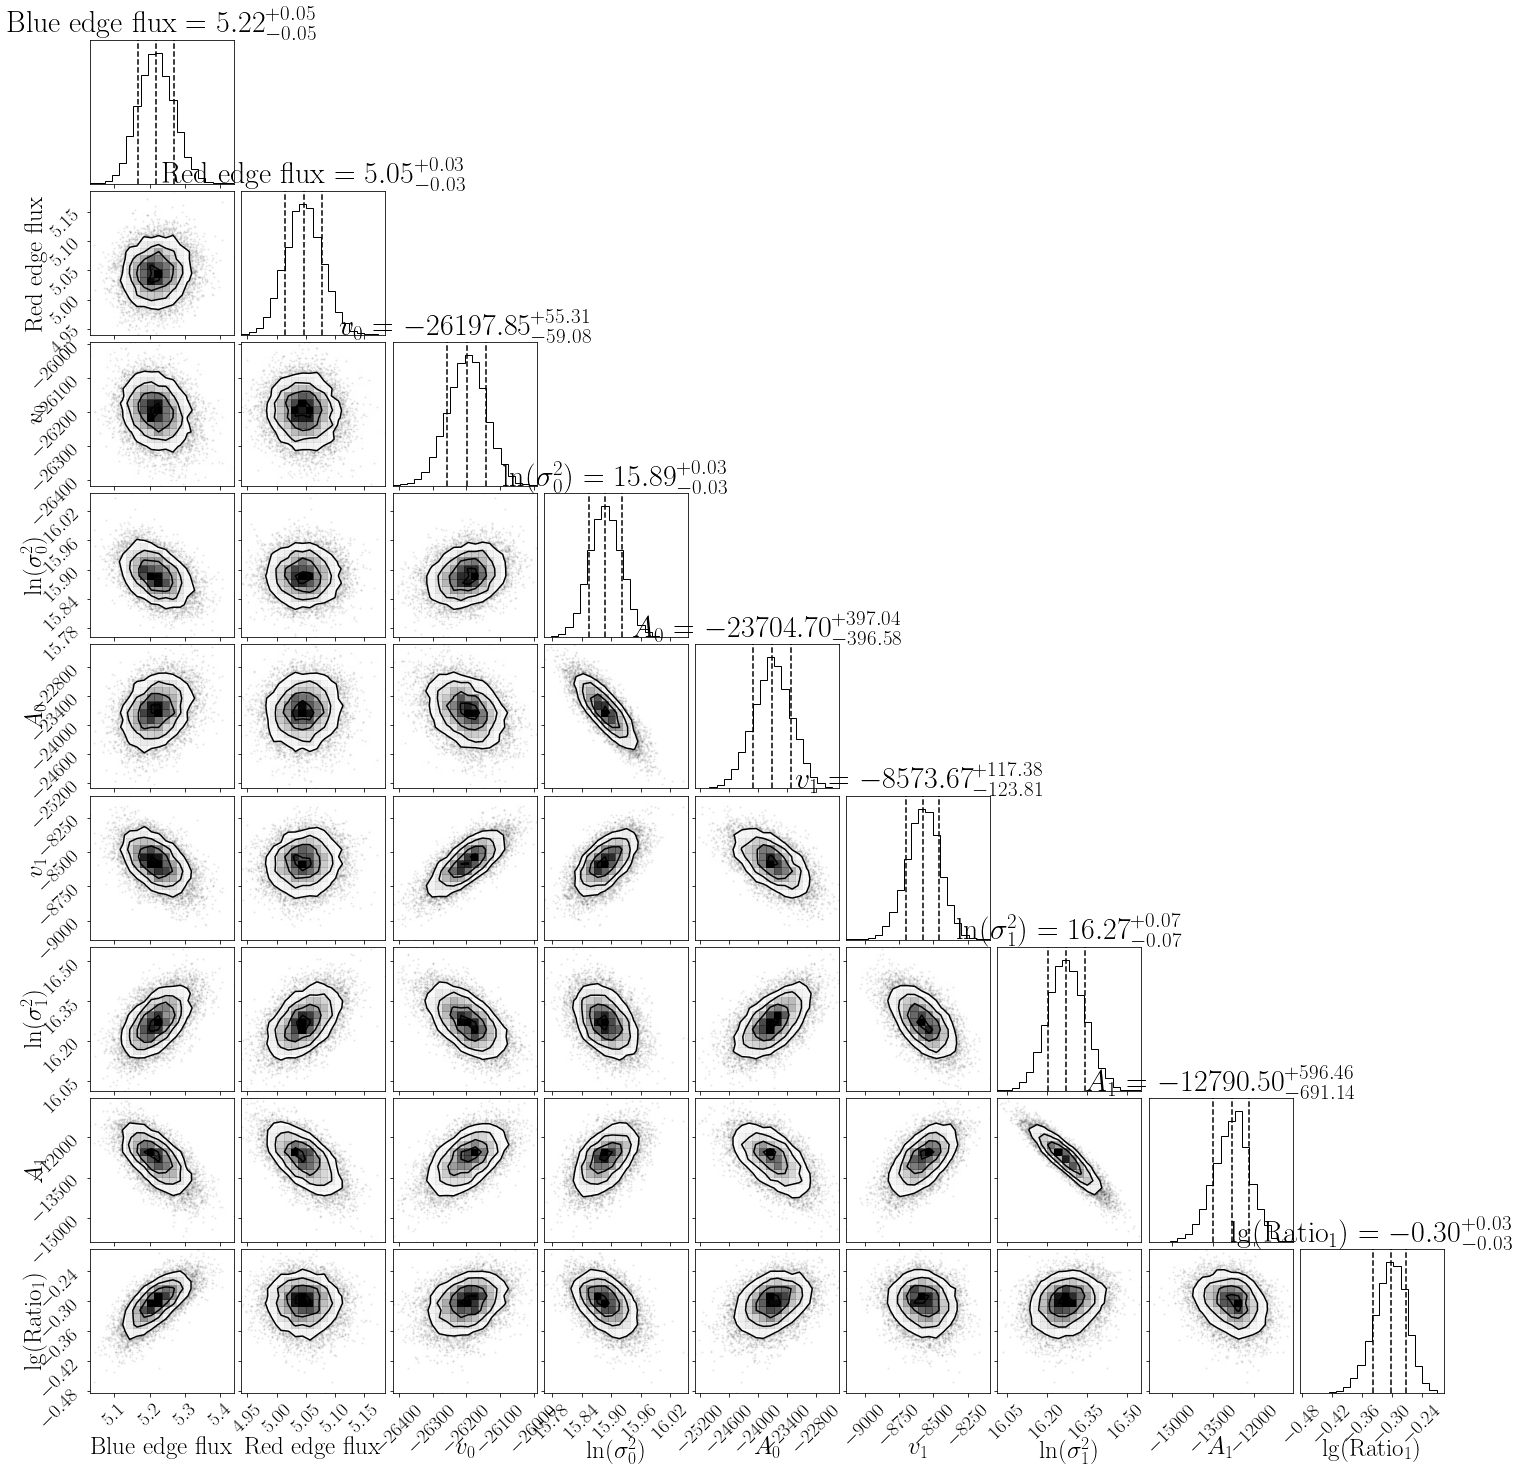

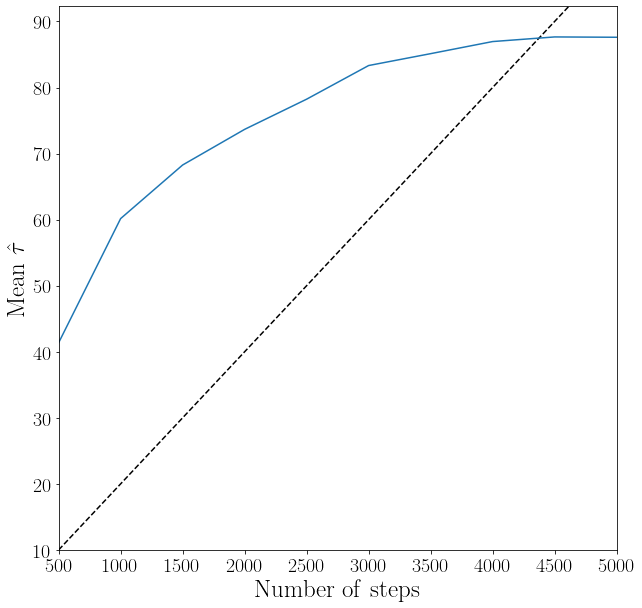

In [7]:
mu1 = -26000
mu2 = -8000
sampler = Spec1.line['HeI_10830/FeII2'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e5],
    var_max=1e10,
    initial=[5, 5, -28000, 15, -2000, -8000, 14, -2000],
    normalize_unc='LS',
    max_nsteps=5000,
    Plot_model=True)
sampler = Spec1.line['HeI_10830/FeII2'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    initial=Spec1.line['HeI_10830/FeII2'].theta_MCMC[:8],
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)

### Three Fe II lines

In [ ]:
Spec1.add_line('HeI_10830/FeII3',
               9300,
               10600,
               lines=[[10830], [9998, 10500, 10863]],
               rel_strength=[[], [1, 1.5, 1]])
               #rel_strength=[[], [0.832, 0.521, 0.374]])

In [ ]:
mu1 = -26000
mu2 = -8000
sampler = Spec1.line['HeI_10830/FeII3'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e6],
    var_max=1e10,
    initial=Spec1.line['HeI_10830/FeII2'].theta_MCMC,
    normalize_unc='LS',
    max_nsteps=3000,
    Plot_model=False)
sampler = Spec1.line['HeI_10830/FeII3'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e6],
    initial=Spec1.line['HeI_10830/FeII3'].theta_MCMC,
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)

## He I hvf + He I pvf

In [ ]:
Spec1.add_line('HeI_10830/HeI_10830',
               9500,
               10500,
               lines=[[10830], [10830]],
               rel_strength=[[1], [1]])
Spec1.line['HeI_10830/HeI_10830'].LS_estimator(guess=(1, 1, -25000, 15, -2000, -15000, 15, -2000))

In [ ]:
mu1 = -26000
mu2 = -17000
sampler = Spec1.line['HeI_10830/HeI_10830'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    var_max=1e10,
    initial=[1, 1, -26000, 16, -5000, -17000, 16, -5000],
    normalize_unc='LS',
    max_nsteps=1000,
    Plot_model=False)
sampler = Spec1.line['HeI_10830/HeI_10830'].MCMC_sampler(
    mu_prior=[-26000, -18000],
    var_prior=[1e7, 1e7],
    initial=Spec1.line['HeI_10830/HeI_10830'].theta_MCMC,
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)

## C I 10693

In [13]:
vel.velocity_rf_line(10830, 10693, Spec1.line['HeI_10830/FeII2'].theta_MCMC[2])

-21843.64475380079

## Mg II 10927

In [14]:
vel.velocity_rf_line(10830, 10927, Spec1.line['HeI_10830/FeII2'].theta_MCMC[2])

-28287.76805962798

## He I 20581

In [15]:
He_spec = Spec1.line['HeI_10830/FeII2']
ratio = 2 / (He_spec.red_vel - He_spec.blue_vel) * \
    (He_spec.wv_line[-1] - He_spec.wv_line[0])
EW_He = He_spec.theta_MCMC[4] * -ratio
sig_EW_He = He_spec.sig_theta_MCMC[4] * ratio
print(EW_He, sig_EW_He)
EW_Fe = He_spec.theta_MCMC[7] * -ratio * (1 + 10**He_spec.theta_MCMC[8])
sig_EW_Fe = He_spec.sig_theta_MCMC[7] * ratio * (1 + 10**He_spec.theta_MCMC[8])
print(EW_Fe, sig_EW_Fe)

2061.167151961385 118.49571081992366
-1450.4172270687716 80.25246064949121


array([ 7.96458715e-01,  7.58822499e-01, -2.56362394e+04,  1.60810341e+01,
       -3.08388488e+03])

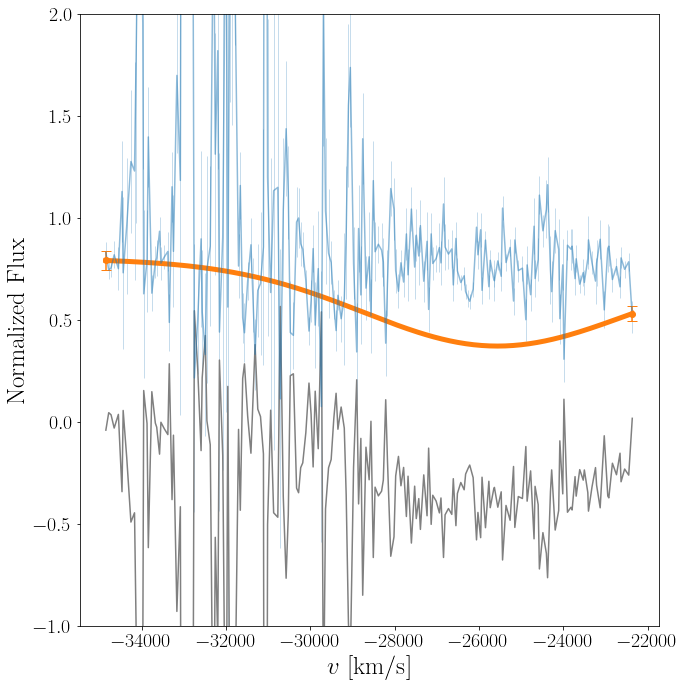

In [16]:
Spec1.add_line('HeI_20581', 18310, 19100, lines=[[20581]], rel_strength=[[1]])
theta_He2 = np.append(Spec1.line['HeI_20581'].blue_fl[0], Spec1.line['HeI_20581'].red_fl[0])
theta_He2 = np.append(theta_He2, Spec1.line['HeI_10830/FeII2'].theta_MCMC[2:5])
theta_He2[-1] *= 1e-1
ax = Spec1.line['HeI_20581'].plot_model(theta_He2, return_ax=True)
ax.set_ylim(-1, 2)
theta_He2

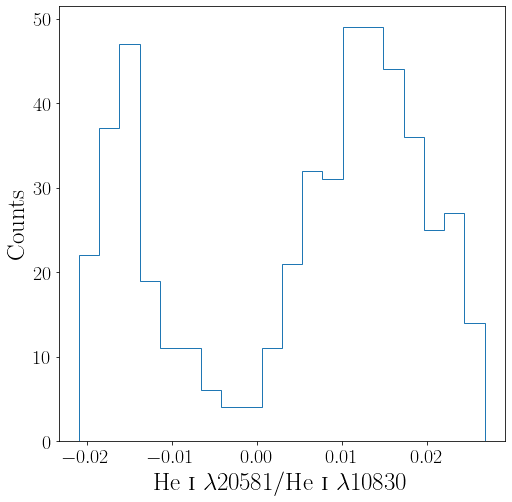

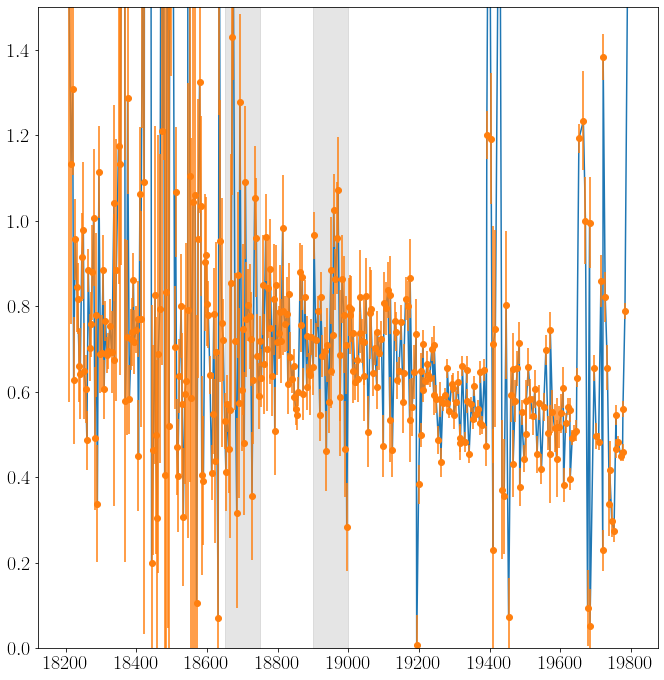

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl

red = np.random.rand(500) * 100 + 18900 # 19000-19200
blue = np.random.rand(500) * 100 + 18650 # 18200-18600

Ratio = []
Ratio_5sigma = []
for k in range(500):
    Spec1.add_line('HeI_20581', blue[k], red[k], lines=[[20581]], rel_strength=[[1]])
    He2 = Spec1.line['HeI_20581']
    Chi2_He2 = []
    ratio = np.linspace(-.05, .1, 501)
    theta_He2 = np.append(Spec1.line['HeI_20581'].red_fl[0],
                          Spec1.line['HeI_20581'].blue_fl[0])
    theta_He2 = np.append(theta_He2,
                              Spec1.line['HeI_10830/FeII2'].theta_MCMC[2:5])
    for r in ratio:
        theta = theta_He2.copy()
        theta[-1] = theta[-1] * r
        chi2 = vel.neg_lnlike_gaussian_abs(theta, He2.rel_strength,
                                           He2.lambda_0, He2.blue_vel, He2.red_vel,
                                           He2.vel_rf, He2.norm_fl, He2.lines,
                                           He2.norm_fl_unc, 'chi2',
                                           He2.free_rel_strength)
        Chi2_He2 = np.append(Chi2_He2, chi2)
    norm = Chi2_He2.min() / len(Chi2_He2)
    ratio = ratio[Chi2_He2 - Chi2_He2.min() < 25 * norm]
    Chi2_He2 = Chi2_He2[Chi2_He2 - Chi2_He2.min() < 25 * norm]
    r = ratio[np.argmin(Chi2_He2)]
    Ratio.append(r)
    '''if r > 0.04:
        theta = theta_He2.copy()
        theta[-1] = theta[-1] * r
        ax = Spec1.line['HeI_20581'].plot_model(theta, return_ax=True)
        ax.set_ylim(-1, 2)
        plt.show()'''

plt.figure(figsize=(8, 8))
plt.xlabel(
    r'$\mathrm{He}\ \textsc{i}\ \lambda 20581/\mathrm{He}\ \textsc{i}\ \lambda 10830$'
)
plt.ylabel(r'$\mathrm{Counts}$')
plt.hist(Ratio, histtype='step', bins=20)
#plt.hist(Ratio_5sigma, histtype='step', bins=20)
plt.show()

ax = Spec1.plot_line_region(18200, 19800)
ax.set_ylim(0, 1.5)
ax.fill_betweenx([0, 1.5], x1=18900, x2=19000, color='0.5', alpha=0.2)
ax.fill_betweenx([0, 1.5], x1=18650, x2=18750, color='0.5', alpha=0.2)
plt.show()

In [18]:
def lambda_rf(lambda0, vel):
    c = 2.99792458e5
    lambda_rf = lambda0 * ((1 + vel / c) / (1 - vel / c))**.5
    return lambda_rf

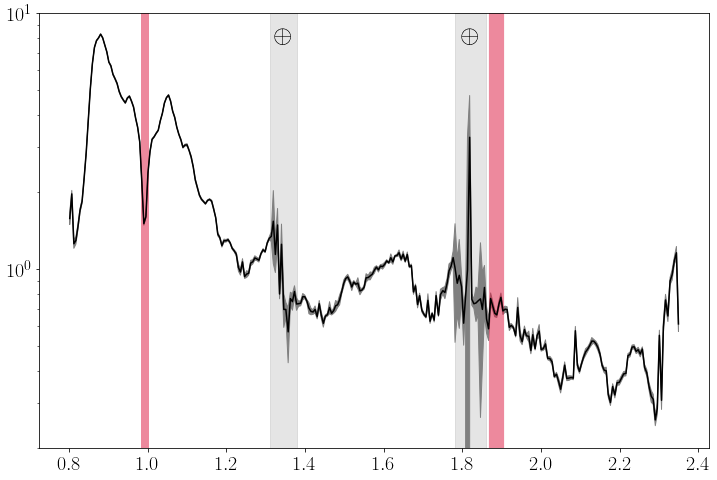

In [27]:
from data_binning import data_binning

X = np.array([Spec1.wv_rf / 1e4, Spec1.fl, Spec1.fl_unc]).T
Y = data_binning(X, size=50e-4)
Y = Y[Y[:, 0] < 2.3500]

plt.figure(figsize=(12, 8))

plt.fill_betweenx([0, 10], x1=1.3100, x2=1.3800, color='0.5', alpha=0.2)
plt.fill_betweenx([0, 10], x1=1.7800, x2=1.8600, color='0.5', alpha=0.2)
plt.text(1.3450, 9, '$\oplus$', va='top', ha='center')
plt.text(1.8200, 9, '$\oplus$', va='top', ha='center')

#He I
plt.axvline(lambda_rf(1.0830, -26115), color='crimson', linewidth=8, alpha=0.5)
plt.axvline(lambda_rf(2.0581, -26115), color='crimson', linewidth=8*(2.0581/1.0830), alpha=0.5)

'''#C I
v_CI = -22340#-12000
plt.axvline(lambda_rf(0.9406, v_CI), color='orange', linewidth=8*(0.9406/1.0693), alpha=0.5)
plt.axvline(lambda_rf(1.0693, v_CI), color='orange', linewidth=8, alpha=0.5)
plt.axvline(lambda_rf(1.2614, v_CI), color='orange', linewidth=8*(1.2614/1.0693), alpha=0.5)
#plt.axvline(lambda_rf(1.4543, v_CI), color='orange', linewidth=8*(1.4543/1.0693), alpha=0.5)
plt.axvline(lambda_rf(2.1259, v_CI), color='orange', linewidth=8*(2.1259/1.0693), alpha=0.5)

#Si I
v_SiI = -18500
plt.axvline(lambda_rf(1.2032, v_SiI), color='cyan', linewidth=8, alpha=0.5)
plt.axvline(lambda_rf(1.0827, v_SiI), color='cyan', linewidth=8, alpha=0.5)
plt.axvline(lambda_rf(1.0585, v_SiI), color='cyan', linewidth=8, alpha=0.5)
plt.axvline(lambda_rf(1.5888, v_SiI), color='cyan', linewidth=8, alpha=0.5)

#Ca II
plt.axvline(lambda_rf(0.8662, -24000), color='darkgreen', linewidth=8, alpha=0.5)
plt.axvline(lambda_rf(0.8662, -9500), color='darkgreen', linewidth=8, alpha=0.5)
plt.axvline(lambda_rf(1.1839, -24000), color='darkgreen', linewidth=8*(1.1839/0.8662), alpha=0.5)
plt.axvline(lambda_rf(1.1839, -9500), color='darkgreen', linewidth=8*(1.1839/0.8662), alpha=0.5)
#plt.axvline(lambda_rf(1.1950, -24000), color='darkgreen', linewidth=8*(1.1950/0.8662), alpha=0.5)
#plt.axvline(lambda_rf(1.1950, -9500), color='darkgreen', linewidth=8*(1.1950/0.8662), alpha=0.5)'''

'''#Mg II
v_MgII = -12000
plt.axvline(lambda_rf(1.0927, v_MgII), color='darkgreen', linewidth=8, alpha=0.5)
plt.axvline(lambda_rf(2.1369, v_MgII), color='darkgreen', linewidth=8*(2.1369/1.0927), alpha=0.5)'''

plt.plot(Y[:, 0], Y[:, 1], color='k')
plt.fill_between(Y[:, 0],
                 Y[:, 1] - Y[:, 2],
                 Y[:, 1] + Y[:, 2],
                 color='0.5',
                 alpha=1)

plt.ylim([0.2, 10])
plt.yscale('log')
#plt.xscale('log')

'''plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.gca().xaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
plt.gca().set_xticks(np.linspace(0.8, 2.3, 15).round(1))'''
plt.show()

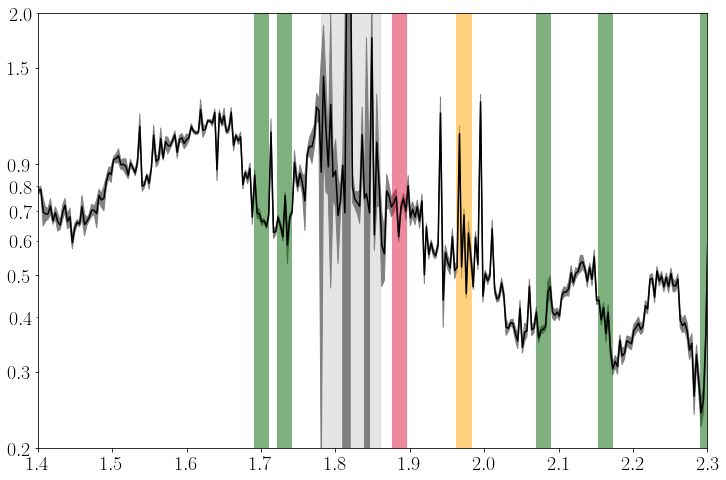

In [20]:
from data_binning import data_binning

X = np.array([Spec1.wv_rf / 1e4, Spec1.fl, Spec1.fl_unc]).T
Y = data_binning(X, size=30e-4)
Y = Y[Y[:, 0] < 2.4000]

plt.figure(figsize=(12, 8))

plt.fill_betweenx([0, 10], x1=1.3100, x2=1.3800, color='0.5', alpha=0.2)
plt.fill_betweenx([0, 10], x1=1.7800, x2=1.8600, color='0.5', alpha=0.2)
#plt.text(1.3450, 9, '$\oplus$', va='top', ha='center')
#plt.text(1.8200, 9, '$\oplus$', va='top', ha='center')

#He I
plt.axvline(lambda_rf(2.0581, -26115),
            color='crimson',
            linewidth=8 * (2.0581 / 1.0830),
            alpha=0.5)

#C I
v_CI = -22340  #-12000
#plt.axvline(lambda_rf(1.4543, v_CI), color='orange', linewidth=8*(1.4543/1.0693), alpha=0.5)
plt.axvline(lambda_rf(2.1259, v_CI),
            color='orange',
            linewidth=8 * (2.1259 / 1.0693),
            alpha=0.5)
'''#Mg II
v_MgII = -12000#-12000
#plt.axvline(lambda_rf(1.4543, v_CI), color='orange', linewidth=8*(1.4543/1.0693), alpha=0.5)
plt.axvline(lambda_rf(2.1369, v_MgII), color='darkgreen', linewidth=8*(2.1369/1.0927), alpha=0.5)'''

#Co II
v_CoII = -8000
plt.axvline(lambda_rf(1.7772, v_CoII),
            color='darkgreen',
            linewidth=15,
            alpha=0.5)
plt.axvline(lambda_rf(1.7462, v_CoII),
            color='darkgreen',
            linewidth=15,
            alpha=0.5)
plt.axvline(lambda_rf(2.1350, v_CoII),
            color='darkgreen',
            linewidth=15,
            alpha=0.5)
plt.axvline(lambda_rf(2.2205, v_CoII),
            color='darkgreen',
            linewidth=15,
            alpha=0.5)
plt.axvline(lambda_rf(2.4596, v_CoII),
            color='darkgreen',
            linewidth=15,
            alpha=0.5)
plt.axvline(lambda_rf(2.3613, v_CoII),
            color='darkgreen',
            linewidth=15,
            alpha=0.5)

plt.plot(Y[:, 0], Y[:, 1], color='k')
plt.fill_between(Y[:, 0],
                 Y[:, 1] - Y[:, 2],
                 Y[:, 1] + Y[:, 2],
                 color='0.5',
                 alpha=1)

plt.yscale('log')
#plt.xscale('log')

plt.gca().xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.gca().xaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
plt.gca().yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
plt.gca().yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
#plt.gca().set_xticks(np.linspace(1.4, 2.4, 7).round(1))
plt.gca().set_yticks(np.geomspace(0.2, 1.5, 5).round(1))
plt.ylim([0.2, 2])
plt.xlim([1.4, 2.3])

plt.show()

In [21]:
lambda_rf(2.2205, -20000)

2.0769912682898606